<a href="https://colab.research.google.com/github/mahmoudmoe84/data-science/blob/master/s02_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering Assignments

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Today's Exercises:**
- Feature Scaling & Transformation
- Feature Encoding (Categorical Data)
- Feature Cleaning & Imputation

### Importing Libraries & Datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Copy of stackoverflow.csv')

In [ ]:
data.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


==========

## Feature Cleaning & Imputation Exercises

##### Q. Check for any missing data in the 'RawSalary' column and handle them wisely

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.0+ KB


In [ ]:
data['RawSalary']

0               NaN
1         70,841.00
2               NaN
3         21,426.00
4        £41,671.00
           ...     
994             NaN
995       58,746.00
996      $55,000.00
997             NaN
998    1,000,000.00
Name: RawSalary, Length: 999, dtype: object

In [ ]:
data['RawSalary'].value_counts()

120000.00    10
75000.00      9
130000.00     9
60000.00      8
140000.00     7
             ..
587460.00     1
17676.00      1
86120.00      1
63642.00      1
50448.00      1
Name: RawSalary, Length: 446, dtype: int64

In [ ]:
data['RawSalary']=data['RawSalary'].str.replace(',','')

In [ ]:
data['RawSalary']=data['RawSalary'].str.replace('$','')
data['RawSalary']=data['RawSalary'].str.replace('£','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
data['RawSalary'] = data['RawSalary'].astype('float32')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    float32
dtypes: float32(1), float64(2), int64(2), object(6)
memory usage: 82.1+ KB


In [ ]:
data['RawSalary'].dtype

dtype('float32')

In [ ]:
from sklearn.impute import MissingIndicator

In [ ]:
mi = MissingIndicator()

In [ ]:
data[mi.fit_transform(data[['RawSalary']])]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary


In [ ]:
mi.fit_transform(data[['RawSalary']]).sum()

334

In [ ]:
data[~mi.fit_transform(data[['RawSalary']])]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,70841.0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,21426.0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,41671.0
5,2/9/18 19:09,Some college/university study without earning ...,120000.0,Yes,Russia,7.0,Git,39,2,Male,120000.0
7,10/16/18 23:36,Some college/university study without earning ...,250000.0,Yes,France,7.0,Git,24,2,Female,250000.0
...,...,...,...,...,...,...,...,...,...,...,...
991,7/14/18 4:51,Master's degree (MA. MS. M.Eng.. MBA. etc.),55562.0,Yes,Sweeden,9.0,Git,34,1,NaN,55562.0
993,3/4/18 19:11,Some college/university study without earning ...,30000.0,Yes,India,0.0,Git,28,5,Male,30000.0
995,4/14/18 15:31,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,Spain,8.0,Git,27,16,Male,58746.0
996,3/21/18 6:34,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,USA,NaN,Git,54,16,Male,55000.0


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'median')

In [ ]:
data['RawSalary']=imputer.fit_transform(data[['RawSalary']])

In [ ]:
data['RawSalary'].isna().sum()

0

In [ ]:
data

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,55562.0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,70841.0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,55562.0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,21426.0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,41671.0
...,...,...,...,...,...,...,...,...,...,...,...
994,10/19/18 13:50,Some college/university study without earning ...,NaN,Yes,France,NaN,Subversion,45,10,Male,55562.0
995,4/14/18 15:31,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,Spain,8.0,Git,27,16,Male,58746.0
996,3/21/18 6:34,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,USA,NaN,Git,54,16,Male,55000.0
997,2/5/18 20:01,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,Sweeden,NaN,Git;Subversion,23,9,NaN,55562.0


In [ ]:
data.isna().sum()

SurveyDate                      0
FormalEducation                 0
ConvertedSalary               334
Hobby                           0
Country                         0
StackOverflowJobsRecommend    512
VersionControl                  0
Age                             0
Years Experience                0
Gender                        306
RawSalary                       0
dtype: int64

##### Q. Check for any outliers in the 'RawSalary' column and handle them wisely

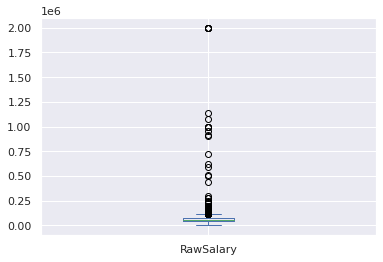

In [ ]:
data['RawSalary'].plot.box()

In [ ]:
q1 = data['RawSalary'].quantile(0.25)
q1

41641.5

In [ ]:
q3 = data['RawSalary'].quantile(0.75)
q3

70000.0

In [ ]:
len(data[(data['RawSalary']>=250000)])

24

In [ ]:
data.drop(data.index[data['RawSalary']>=250000],inplace= True)

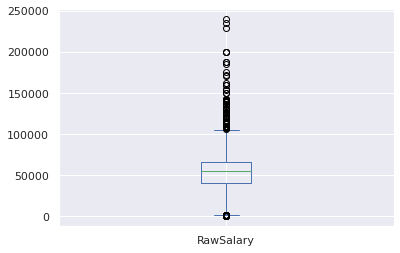

In [ ]:
data['RawSalary'].plot.box()

==========

## Feature Scaling & Normalizing Exercises

##### Q. Let's scale / normalize the data in the 'Age' column

In [ ]:
data.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,55562.0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,70841.0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,55562.0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,21426.0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,41671.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
age_scaler = MinMaxScaler()

In [ ]:
data['Age'] = age_scaler.fit_transform(data[['Age']])

In [ ]:
data.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,0.046154,13,Male,55562.0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,0.307692,9,Male,70841.0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,0.415385,11,NaN,55562.0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,0.430769,12,Male,21426.0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,0.323077,7,Male,41671.0


==========

## Feature Encoding Exercises

##### Q. How about encoding the data in the 'Hobby' / 'Gender' column

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
hobby_enc = OneHotEncoder()

In [ ]:
# to array since one hot encoder produces compressed data
hobby_new = hobby_enc.fit_transform(data[['Hobby']]).toarray().flatten()
hobby_new

array([0., 1., 0., ..., 1., 0., 1.])

In [ ]:
hobby_new = pd.Series(hobby_new)

In [ ]:
gender_end = OneHotEncoder()
gender_new = gender_end.fit_transform(data[['Gender']]).toarray().flatten()
gender_new

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
gender_new = pd.Series(gender_new)
gender_new

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8770    0.0
8771    0.0
8772    0.0
8773    0.0
8774    1.0
Length: 8775, dtype: float64

In [ ]:
data['Gender_new'] = gender_new
data['hobby_new'] = hobby_new

In [ ]:
data.drop(['Hobby','Gender'],axis=1,inplace=True)
data.head()

,SurveyDate,FormalEducation,ConvertedSalary,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,RawSalary,0,1,Gender_new,hobby_new
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,South Africa,NaN,Git,0.046154,13.0,55562.0,0.0,0.0,0.0,0.0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Sweeden,7.0,Git;Subversion,0.307692,9.0,70841.0,0.0,1.0,0.0,1.0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Sweeden,8.0,Git,0.415385,11.0,55562.0,0.0,0.0,0.0,0.0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Sweeden,NaN,Zip file back-ups,0.430769,12.0,21426.0,0.0,1.0,0.0,1.0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,UK,8.0,Git,0.323077,7.0,41671.0,1.0,1.0,1.0,1.0


##### Q. And also, we need to encode the 'Country' column

In [ ]:
data['Country'].unique()

array(['South Africa', 'Sweeden', 'UK', 'Russia', nan, 'France', 'Spain',
       'USA', 'India', 'Ireland', 'Ukraine'], dtype=object)

In [ ]:
data['Country'].isna().sum()

7800

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
country_enc = LabelEncoder()

In [ ]:
data['Country_new'] = country_enc.fit_transform(data[['Country']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
data.head()

,SurveyDate,FormalEducation,ConvertedSalary,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,RawSalary,0,1,Gender_new,hobby_new,Country_new
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,South Africa,NaN,Git,0.046154,13.0,55562.0,0.0,0.0,0.0,0.0,4
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Sweeden,7.0,Git;Subversion,0.307692,9.0,70841.0,0.0,1.0,0.0,1.0,6
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Sweeden,8.0,Git,0.415385,11.0,55562.0,0.0,0.0,0.0,0.0,6
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Sweeden,NaN,Zip file back-ups,0.430769,12.0,21426.0,0.0,1.0,0.0,1.0,6
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,UK,8.0,Git,0.323077,7.0,41671.0,1.0,1.0,1.0,1.0,7


In [ ]:
data.drop(['Country'],axis=1,inplace=True)

In [ ]:
data.head()

,SurveyDate,FormalEducation,ConvertedSalary,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,RawSalary,0,1,Gender_new,hobby_new,Country_new
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,NaN,Git,0.046154,13.0,55562.0,0.0,0.0,0.0,0.0,4
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,7.0,Git;Subversion,0.307692,9.0,70841.0,0.0,1.0,0.0,1.0,6
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,8.0,Git,0.415385,11.0,55562.0,0.0,0.0,0.0,0.0,6
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,NaN,Zip file back-ups,0.430769,12.0,21426.0,0.0,1.0,0.0,1.0,6
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,8.0,Git,0.323077,7.0,41671.0,1.0,1.0,1.0,1.0,7


===========

In [ ]:
b

# THANK YOU!